# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

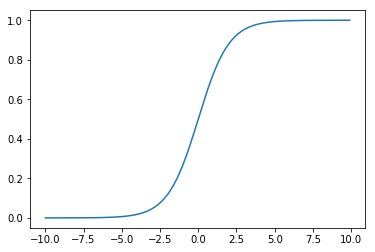

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ<br><br>パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>Logistic Sigmoid をアクティベーション関数として<br>持つパーセプトロンを用いて作成せよ。<br><br>パーセプトロンのパラメータの調整には平均二乗誤差と最急降下法を用いること。<br><br>また、調整済みのパラメータを保存し、作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<img src="images/perceptron.png"  height="50%" width="50%" align="left">
<img src="images/param_a.png"  height="50%" width="50%" align="left">
<img src="images/param_b.png"  height="50%" width="50%" align="left">  

**用意するデータ**  
入力データ = np.array([0, 1, 1, 0, 1, 0, 0, 1])  
正解データ = np.array([1, 0, 0, 1, 0, 1, 1, 0])  
データ総数nとする  


**入力層(式)**  
$
y= a*X+ b
$

**中間層(シグモイド関数: a=1とする)**  
$ 
S = \frac{1}{1-e^-y}  
$

**誤差関数(平均二乗誤差)**  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  


**誤差関数式(平均二乗誤差)**  
※正解データをZと置く  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測値 - Z_i)^2
$  

**パラメータ更新式**   
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -Z_i)^2}
$


パラメータ更新では、予測値Sと正解データZの誤差が最小になるよう更新する  
最急降下法を使いパラメータ更新を行う。  

**最急降下法**  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-Z_i)^2}{d  a}
$  
**パラメータa 更新式**  
$
a^(k+1) = a^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*a*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))  
$

**パラメータb 更新式**  
$
b^(k+1) =  b^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*(-\frac{1}{1+e^-aX_i+b}))
$

<img src="images/Q4式.png" height="100%" width="100%" align="left">

mean_squared_error :  0.3285819780524566
書き出し parameter['a'][-1] :  0.4891097080007074
書き出し parameter['b'][-1] :  0.4158032364582861
学習回数 : 1 回


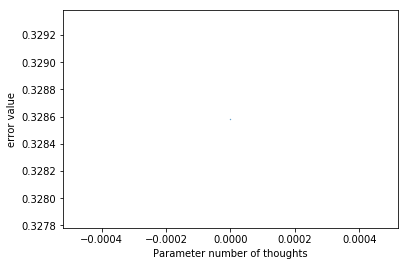

In [17]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, answer, predicted_data):
        """パラメータ更新
        param1 : answer (正解値)
        param2 : predicted_data (予測データ)
        """
        # バイアスの計算が間違っていた(e^-(aX+b)に対して、bの微分は == e^-(aX+b)が答え)
        self._a = self._a - self._v*(2/len(predicted_data)*(sum((predicted_data-answer)*(self._a*predicted_data)*(1-predicted_data))))  # 重みパラメータ
        self._b = self._b - self._v*(2/len(predicted_data)*(sum((predicted_data-answer)*(-predicted_data)))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    input_data = np.array([0, 1, 1, 0, 1, 0, 0, 1])  # 入力値
    answer_data = np.array([1, 0, 0, 1, 0, 1, 1, 0])  # 正解値
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.5  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}


    for _ in range(1):
        if mean_squared_error is not None and mean_squared_error < 0.01:  # 誤差0.01以下になったら終わり
            # 最後のパラメータを保存
            print(a, b)
            parameter["a"].append(a)
            parameter["b"].append(b)
            break
        else:
            y = neuron.input_layer(input_data)  # 入力層
            s = neuron.activation_function(y)  # 中間層
            mean_squared_error = neuron.error_function(s, answer_data)  # 出力層　： 誤差関数

            a, b = neuron.parameter_update(answer_data, s)  # パラメータ更新
            parameter["a"].append(a)
            parameter["b"].append(b)
            
            print("mean_squared_error : ", mean_squared_error)
            error_list.append(mean_squared_error)

    # 更新済みパラメータ保存
    print("書き出し parameter['a'][-1] : ", parameter['a'][-1])
    print("書き出し parameter['b'][-1] : ", parameter['b'][-1])
    
    with open('output/output_Q3.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=0.1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

## 【結論】
上記結果より、


# Q4. 真の入力値が 0 のとき関数の受け取る入力が平均 0 標準偏差 0.5 の<br>正規分布に従い、真の入力値が 1 のとき関数の受け取る入力が<br>平均 1 分散 0.5 の正規分布に従うとする。<br><br>この時、問題 3 で作成した論理否定を行う関数の正解率を求め、<br>その結果について考察し、必要があれば正解率を改善せよ。

# 学習データ(入力値)作成

## 真の値が0の時に入力値は「平均0, 標準偏差√0.01の正規分布に従う」

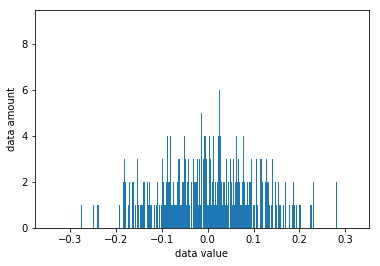

In [6]:
# 真の入力値が 0の時
input_0_data = np.random.normal(0, math.sqrt(0.01), (1,5000))

plt.hist(input_0_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

##  真の入力値は「 1 のとき関数の受け取る入力が平均 1 標準偏差√0.01 の正規分布に従う」

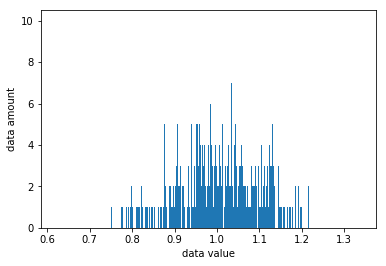

In [24]:
# 真の入力値が 1の時
input_1_data = np.random.normal(1, math.sqrt(0.01), (1,5000))
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

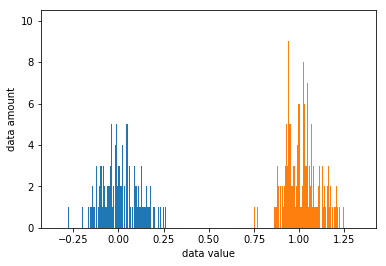

In [25]:
plt.hist(input_0_data[0], 5000)
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

In [26]:
# 入力値を結合して準備
input_data = np.concatenate([input_0_data[0], input_1_data[0]])

### 正解データを作る

In [27]:
# 正解データを作る
answer_0 = np.zeros(5000)  # 0の配列
answer_1 = np.ones(5000)  # 1の配列
answer = np.concatenate([answer_0, answer_1])  # 1,0配列を横に結合

## 解答パターン1  (乱数をそのまま利用している)

mean_squared_error :  0.20554275914174572
mean_squared_error :  0.3098071546149013
mean_squared_error :  0.3388825975598948
mean_squared_error :  0.19664453510871216
mean_squared_error :  0.35090558193257887
mean_squared_error :  0.32449669874386616
mean_squared_error :  0.28991168144788193
mean_squared_error :  0.25058048806626
mean_squared_error :  0.2959834833221782
mean_squared_error :  0.2806573676013065
mean_squared_error :  0.3876254322821293
mean_squared_error :  0.28408987302668165
mean_squared_error :  0.32949585699211986
mean_squared_error :  0.2923356319962685
mean_squared_error :  0.37267978816890335
mean_squared_error :  0.38091082316834624
mean_squared_error :  0.2715447921389269
mean_squared_error :  0.3388051103016161
mean_squared_error :  0.26609045338681164
mean_squared_error :  0.26556787248681096
mean_squared_error :  0.34819050308567334
mean_squared_error :  0.39298870116022144
mean_squared_error :  0.3611117475048845
mean_squared_error :  0.3832886834213982
mean_

mean_squared_error :  0.49999999768419484
mean_squared_error :  0.4999999970025727
mean_squared_error :  0.4999999968771112
mean_squared_error :  0.4999999952421808
mean_squared_error :  0.49999999592677385
mean_squared_error :  0.4999999971913866
mean_squared_error :  0.4999999985750841
mean_squared_error :  0.49999999909347836
mean_squared_error :  0.4999999988415606
mean_squared_error :  0.499999998464285
mean_squared_error :  0.49999999916650634
mean_squared_error :  0.49999999888122176
mean_squared_error :  0.4999999989505119
mean_squared_error :  0.4999999992652504
mean_squared_error :  0.49999999922464833
mean_squared_error :  0.49999999926845556
mean_squared_error :  0.49999999946010976
mean_squared_error :  0.49999999938013495
mean_squared_error :  0.4999999994631468
mean_squared_error :  0.49999999916742727
mean_squared_error :  0.49999999893103303
mean_squared_error :  0.4999999994373821
mean_squared_error :  0.4999999995950342
mean_squared_error :  0.4999999995022995
mean_s

mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared

mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared_error :  0.5
mean_squared

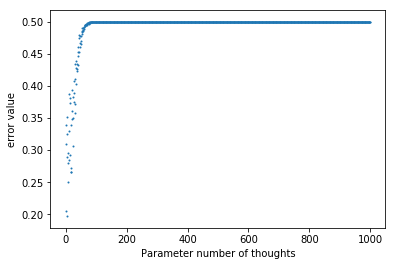

In [30]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        if np.where(x == 0):
            x = x + np.random.normal(0, 0.5) # 平均0, 標準偏差0.5 の 正規分布に則った 誤差あり
            y = self._a*x + self._b 
        if np.where(x == 1):
            x = x + np.random.normal(1, math.sqrt(0.5)) # 平均1, 標準偏差0.5 の 正規分布に則った 誤差あり
            y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, answer, predicted_data):
        """パラメータ更新
        param1 : answer (正解値)
        param2 : predicted_data (予測データ)
        """
        self._a = self._a - self._v*(2/len(predicted_data)*(sum((predicted_data-answer)*(self._a*predicted_data)*(1-predicted_data))))  # 重みパラメータ
        self._b = self._b - self._v*(2/len(predicted_data)*(sum((predicted_data-answer)*(-predicted_data)))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] は次の様に用意[array([-0.65254759,  0.63492252,  0.32712462, ...,  3.54405229, 0.42009267,  2.46580509]) , array([0., 1., 0., ..., 1., 0., 1.])]この形にする
    np.random.shuffle(data)   # シャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        mean_squared_error = neuron.error_function(s, data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(data[:,1], s)  # パラメータ更新
        parameter["a"].append(a)
        parameter["b"].append(b)

        print("mean_squared_error : ", mean_squared_error)
        error_list.append(mean_squared_error)

    # 更新済みパラメータ保存
    print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a : ", parameter["a"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()
    


## 解答パターン2 (予測結果(出力値)10回づつをまとめた平均でパラメータ更新)

In [10]:
# from numpy.random import *
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# import json


# class Neuron:

#     def __init__(self, a, b, v):
#         self._a = a  # 重みパラメータ
#         self._b = b  # バイアス
#         self._v = v  # ハイパーパラメータ
#         self._error = None  

#     def input_layer(self, x):
#         """線形変換
#         param1 : x (入力値)
#         """
#         if np.where(x == 0):
#             x = x + np.random.normal(0, 0.5) # 平均0, 標準偏差0.5 の 正規分布に則った 誤差あり
#             y = self._a*x + self._b 
#         if np.where(x == 1):
#             x = x + np.random.normal(1, math.sqrt(0.5)) # 平均1, 標準偏差0.5 の 正規分布に則った 誤差あり
#             y = self._a*x + self._b
#         return y

#     def activation_function(self, y):
#         """活性化関数
#         param1 : y (入力層の計算結果)
#         """
#         s = 1 / (1 + math.e**-y)  # シグモイド関数
#         return s

#     def error_function(self, s, answer):
#         """誤差関数
#         param1 :  s (出力値)
#         param2 :  answer (正解値)
#         """
#         mean_squared_error = sum(s - answer)**2/len(answer)  # 平均二乗誤差関数
#         return mean_squared_error

#     def parameter_update(self, ten_times_error, ten_times_output):
#         """パラメータ更新
#         param1 : answer (正解値)
#         param2 : predicted_data (予測データ)
#         """
#         print("ten_times_error : ", ten_times_error)
#         print("ten_times_output : ", ten_times_output)
#         self._a = self._a - self._v*2*(sum((ten_times_error)/len(ten_times_output)*(self._a*ten_times_output)*(1-ten_times_output)))  # 重みパラメータ
#         self._b = self._b - self._v*2*(sum((ten_times_error)/len(ten_times_output)*(self._b*ten_times_output)*(1-ten_times_output)))  # バイアス
#         return self._a, self._b    


# if __name__=='__main__':
#     data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] は次の様に用意[array([-0.65254759,  0.63492252,  0.32712462, ...,  3.54405229, 0.42009267,  2.46580509]) , array([0., 1., 0., ..., 1., 0., 1.])]この形にする
#     np.random.shuffle(data)   # シャッフル
#     a = 0.5   # 初期値のパラメータ
#     b = 0.3  # バイアス
#     v = 0.1  # ハイパーパラメータ(調整項)
#     error_list = []  # 誤差リスト(出力用に集計)
#     mean_squared_error = None  # 誤差関数を受け取る変数
#     neuron = Neuron(a, b, v)  # インスタンス化 
#     parameter = {"a":[], "b":[]}
#     ten_times_error = []  # 10回分の誤差保存用
#     ten_times_output = []  # 10回分の出力保存用
    
#     for j in range(1000):
#         if  j == 0 or j%10 != 0:  
#             y = neuron.input_layer(data[:,0])  # 入力層
#             s = neuron.activation_function(y)  # 中間層
#             ten_times_output.append(s)
#             ten_times_error.append(neuron.error_function(s, data[:,1]))  # 出力層　： 誤差関数
#             print("ten_times_error : ", ten_times_error)
#         else:
#             # 10回分の誤差の平均をupdate(誤差平均)
#             ten_times_error = ten_times_error[0]/10
#             print("else : ", ten_times_error/len(ten_times_output))
#             print("else : ", type(ten_times_error))    
#             print("ten_times_output : ", len(ten_times_output)+1)
#             a, b = neuron.parameter_update(ten_times_error, ten_times_output)  # パラメータ更新
#             parameter["a"].append(a)
#             parameter["b"].append(b)
#             ten_times_error = []  # 10回分の誤差保存用
#             ten_times_output = []  # 10回分の出力保存用

#             print("mean_squared_error : ", mean_squared_error)
#             error_list.append(mean_squared_error)

#     # 更新済みパラメータ保存
#     print("書き出し parameter : ", parameter)
#     with open('output/output_Q4.json', 'w') as f:
#         json.dump(parameter, f)
            
#     # 描画
#     print("error_list: ", error_list)
#     print("学習回数 : %s 回" % len(error_list))
#     plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
#     plt.xlabel('Parameter number of thoughts')
#     plt.ylabel('error value')
#     plt.show()
    
